# A Gentle Introduction to Q-learning in Python

__PyData Bristol__ meetup, 17 July 2019. Author: Jan Malte Lichtenberg (j.m.lichtenberg@bath.ac.uk)

Implement tabular Q-learning algorithm in a simple "grid world" environment and visualise learning behaviour. The following figure shows the agent-environment interaction (figure from Sutton & Barto 1998).
<div>
<div>
<img src="images/withAgent.png" style="width: 30%;" align="left"/> 
</div>
<div>
<img src="images/agent-environment.png" style="width: 55%;"/> 
</div>
</div>
We will need an __agent__, an __environment__, and a procedure that determines how these two entities interact with each other. The environment is provided, the rest will be implemented as we go along...

## The environment: a "grid world" 

The following cell imports the `Gridworld` class from the `gridowrld.py` file. 

In [1]:
import gridworld
env = gridworld.Gridworld()

The agent starts in a randomly chosen position in the bottom row. We can visualize the current state of the environment as follows.

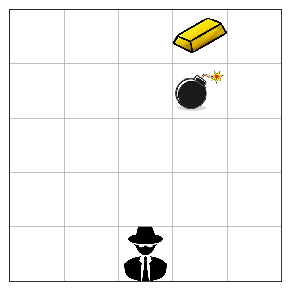

In [2]:
%matplotlib inline
env.visualize()

The `Gridworld` class has a method called `make_step()` that takes an `action_index` as an input and returns a new state as well as the reward associated with the step. The agent can choose among four actions (`0 = "north", 1 = "east", 2 = "south", 3 = "west"`).  Let's go north and visualize the environment again.

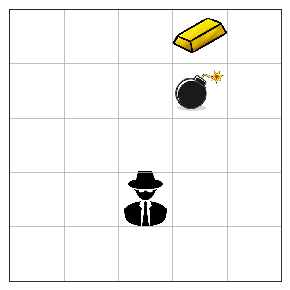

In [3]:
env.make_step(action_index=0)  #  0 = "north",   1 = "east",   2 = "south",   3 = "west"
env.visualize()

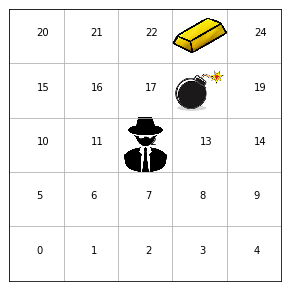

The agent's new position is 12
The obtained reward is  -1.0


In [4]:
reward, new_position = env.make_step(action_index=0)  #  0 = "north",   1 = "east",   2 = "south",   3 = "west"
env.visualize(show_state_labels=True)
print("The agent's new position is", new_position)
print("The obtained reward is ", reward)

## The Q-learning agent.

<div>
<div>
<img src="images/q.png" style="width: 66.65%;" align="left"/>
</div>
<div>
<img src="images/agent-environment.png" style="width: 33.33%;" align="left"/> 
</div>
</div>

Figures from Sutton & Barto (1998), Reinforcement Learning.

In [23]:
def q_learning(env, agent, visualize=True, num_episodes=10, sleep_between_each_step=0):
    for episode in range(num_episodes):
        env.reset()
        game_over = False
        while not game_over:
            old_state = env.agent_position
            action = agent.choose_action(old_state)
            reward, new_state = env.make_step(action)
            agent.learn(old_state, reward, new_state, action)
            env.visualize()
            # Check whether agent is at terminal state. If yes: end episode; reset agent.
            if env.is_terminal_state():
                game_over = True

In [24]:
class AgentQ:
    def __init__(self, num_states, num_actions, epsilon=0.05, alpha=0.1):
        self.num_actions = num_actions
        self.q_table = np.zeros(shape=(num_states, self.num_actions))
        self.epsilon = epsilon
        self.alpha = alpha

    def choose_action(self, current_state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.randint(0, self.num_actions)
        else:
            q_values_of_state = self.q_table[current_state, :]
            action = np.argmax(q_values_of_state)
            # The above is not entirely correct because
            # `np.argmax()` always chooses the first maximum value.
            # The following chooses randomly AMONG all maximum Q-values
            # max_q_value = np.max(q_values_of_state)
            # maximum_q_values = np.nonzero(q_values_of_state == max_q_value)[0]
            # action = np.random.choice(maximum_q_values)
        return action

    def learn(self, old_state, reward, new_state, action):
        max_q_value_in_new_state = np.max(self.q_table[new_state, :])
        current_q_value = self.q_table[old_state, action]
        self.q_table[old_state, action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + max_q_value_in_new_state)

Learn for a couple of episodes...

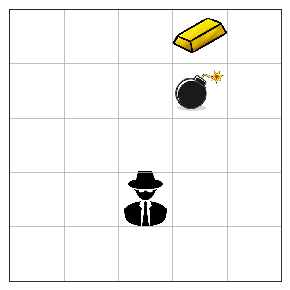

In [ ]:
import numpy as np
np.random.seed(1)
env = gridworld.Gridworld()
agent = AgentQ(num_states=env.num_states, num_actions=env.num_actions)
q_learning(env=env, agent=agent, num_episodes=10)

## Visualization of policy and learning curve for a Q-learning agent
We now let the q-learning agent play and learn (without watching) and then visualize its policy afterwards.

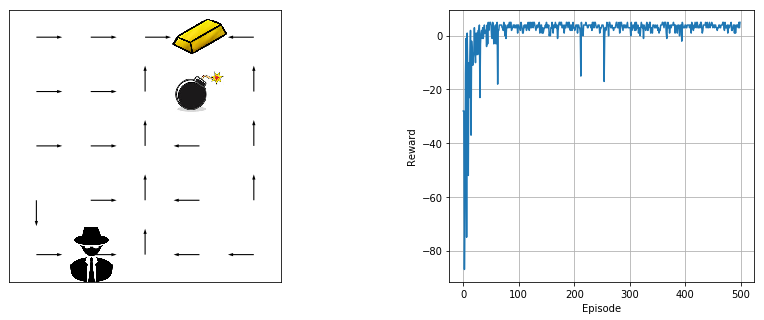

In [21]:
from q_solution import AgentQ, q_learning
import numpy as np
np.random.seed(1)
env = gridworld.Gridworld(random_move_probability=0.01)
agent = AgentQ(env)

# Do not visualize during play.
reward_per_episode = q_learning(env=env, agent=agent, num_episodes=500)

# Plot policy and learning curve.
env.visualize(show_grid=True, show_policy=True, show_learning_curve=True,
              episode=len(reward_per_episode), reward_per_episode=reward_per_episode, 
              agent_q_table=agent.q_table)

## Visualization of learning process for a Q-learning agent

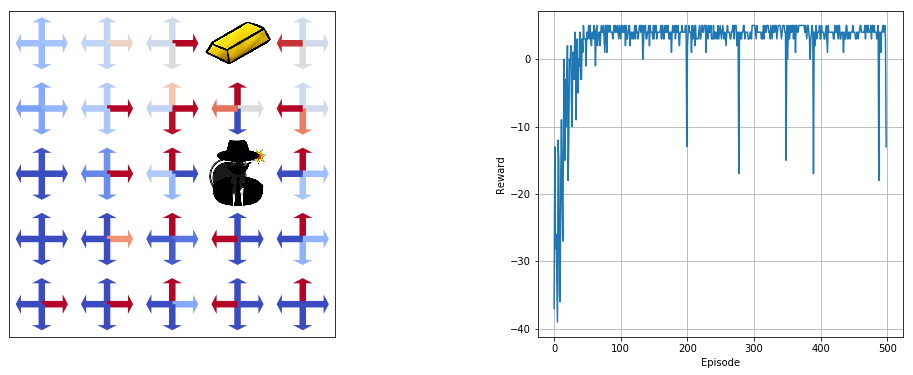

In [22]:
## Let agentQ play and watch while she is learning
np.random.seed(2)

# Define the envronment
env = gridworld.Gridworld(random_move_probability=0.01, bomb_positions=np.array([13]))

# Define the Q-learning agent
agent = AgentQ(env, alpha=0.1, epsilon=0.01)

rewards_per_episode = q_learning(env, agent, num_episodes=500, learn=True,
                                 show_grid=True, show_q_values=True, show_learning_curve=True)